# Generating a set of observation points

Notebook to open a dictionary with the properties of a set observation points 

#### Import libraries

In [1]:
%matplotlib inline
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from fatiando.utils import gaussian2d
from fatiando.gridder import regular

In [2]:
notebook_name = 'generating_grid.ipynb'

#### Importing auxiliary functions

In [3]:
dir_modules = '../../'
sys.path.append(dir_modules)

In [4]:
import my_package as fc

#### List of saved files

In [5]:
saved_files = []

## 2D grid of points

### Regular grid

In [6]:
regular_grid = dict()

In [7]:
regular_grid['area'] = [-2000.,2000.,-2000.,2000.]
regular_grid['Nx'],regular_grid['Ny'] = 50, 50
regular_grid['shape'] = (regular_grid['Nx'],regular_grid['Ny'])
regular_grid['z_obs'] = -250.-100.
regular_grid['N'] = regular_grid['Nx']*regular_grid['Ny'] 

In [8]:
regular_grid['x'],regular_grid['y'],regular_grid['z'] = regular(regular_grid['area'],regular_grid['shape'],regular_grid['z_obs'])

#### Regular grid spacing

In [9]:
regular_grid['dx'] = (regular_grid['area'][1] - regular_grid['area'][0])/(regular_grid['Nx']-1.)

print 'dx = %.1f m' % regular_grid['dx']

dx = 81.6 m


In [10]:
regular_grid['dy'] = (regular_grid['area'][3] - regular_grid['area'][2])/(regular_grid['Ny']-1)

print 'dy = %.1f m' % regular_grid['dy']

dy = 81.6 m


In [11]:
print 'Shape : (%.0f,%.0f)'% regular_grid['shape'] 
print 'Number of data: %.1f' % regular_grid['N']
print 'dx: %.1f $\mu m$' % regular_grid['dx']
print 'dy: %.1f $\mu m$ ' % regular_grid['dy']
print 'Height: %.1f $\mu m$' % regular_grid['z_obs']

Shape : (50,50)
Number of data: 2500.0
dx: 81.6 $\mu m$
dy: 81.6 $\mu m$ 
Height: -350.0 $\mu m$


#### Regular grid visualization

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


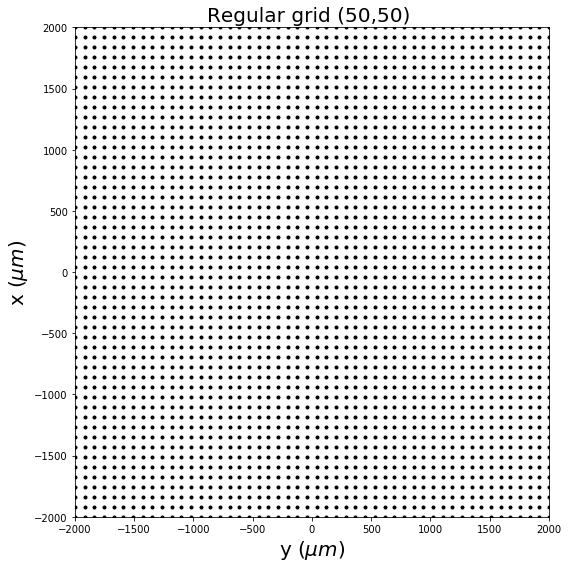

In [12]:
title_font = 20
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(8,8), tight_layout=True)

plt.title('Regular grid (%.0f,%.0f) ' % (regular_grid['Nx'],regular_grid['Ny']), fontsize=title_font)
plt.plot(regular_grid['y'], regular_grid['x'],'k.')
plt.xlabel('y ($\mu m$)', fontsize = title_font)
plt.ylabel('x ($\mu m$)', fontsize = title_font)
plt.ylim(np.min(regular_grid['x']),np.max(regular_grid['x']))
plt.xlim(np.min(regular_grid['y']),np.max(regular_grid['y']))


file_name = 'figs/grid_regular'
plt.savefig(file_name+'.png',dpi=200)
saved_files.append(file_name+'.png')


plt.show()

#### Regular grid with topography

#### Generating .pickle file

In [13]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
regular_grid['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [14]:
file_name = 'data/regular_grid.pickle'
with open(file_name, 'w') as f:
    pickle.dump(regular_grid, f)
    
saved_files.append(file_name)


## Saved files

In [15]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/grid_regular.png
2  data/regular_grid.pickle
